#### utilizar dataset scaler
#### utilizar dataset normal

#### Analistar autocorelação da variavel target
#### teste de hipotese para distribuição normal
#### teste de hipotese para serie estacionaria (media e variavia se mantem) - Dickey-fuller, KPSS, Philips-Perron
#### analisar residuos - Ljung-box avalia se a serie é autocorelacionada


In [2]:
library("tidyverse")
library("forecast")
library("ggplot2")
library('nortest')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Rows: 12996 Columns: 303

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (302): Open, Close, High, Low, Volume, Close_Ema_5, High_Ema_5, Low_Ema...
date   (1): Date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



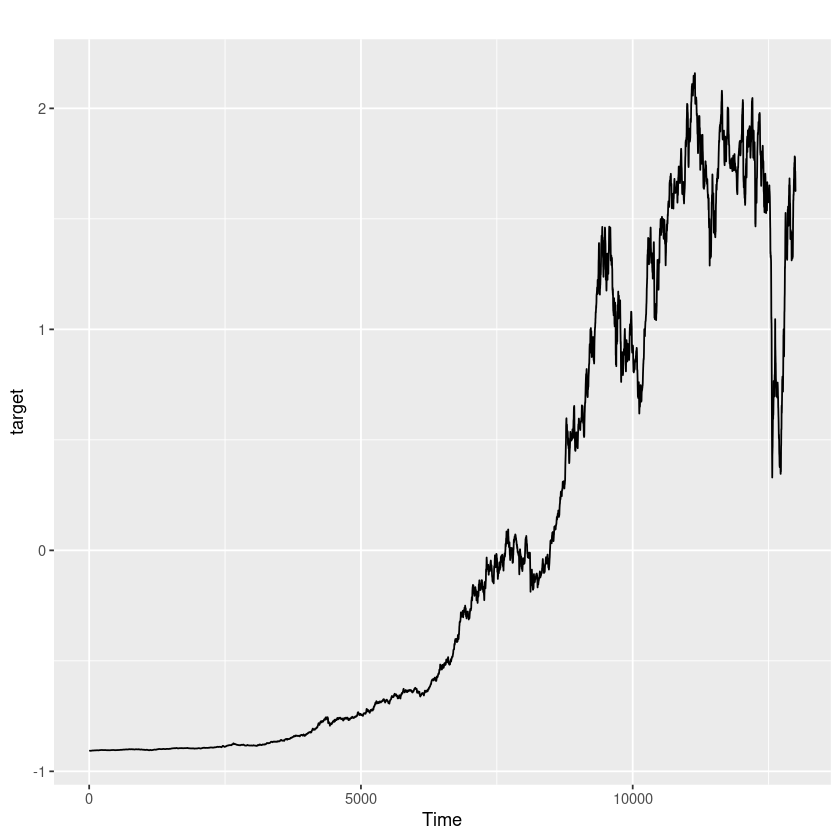

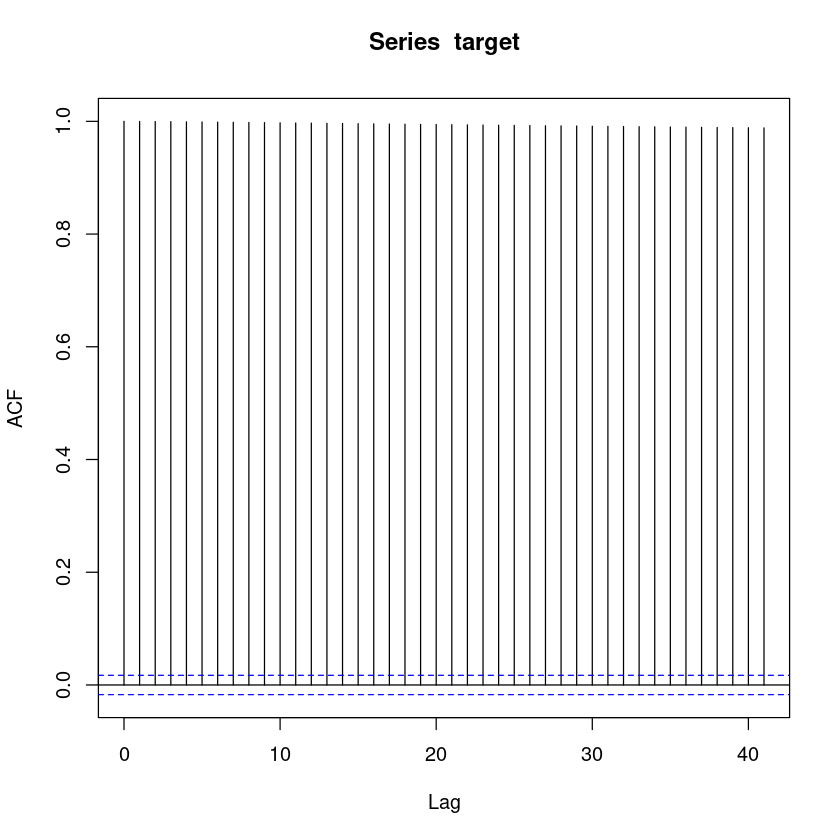

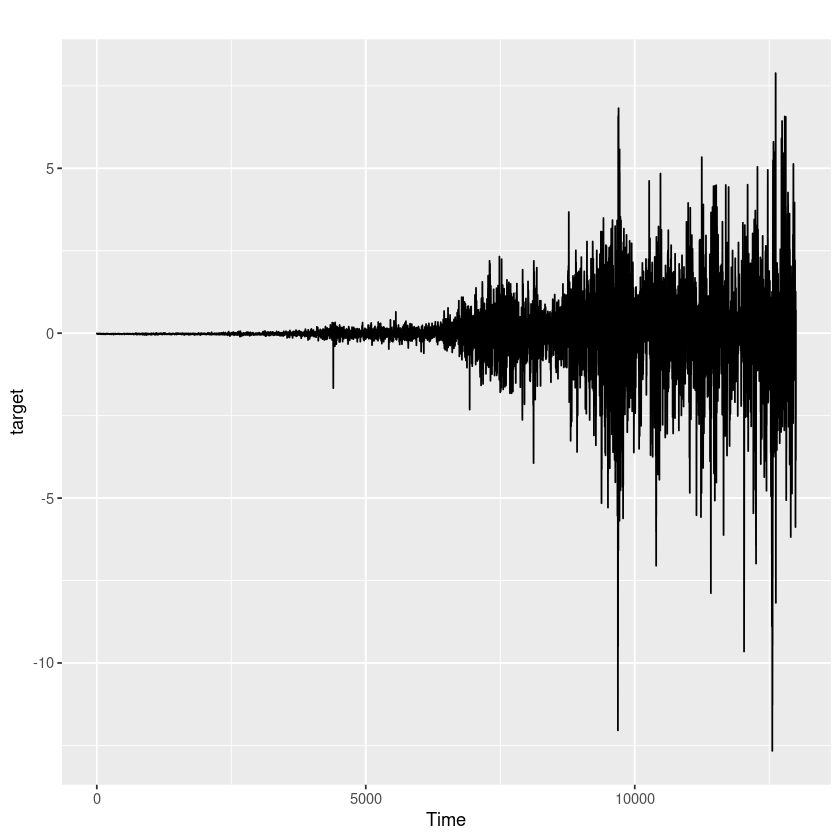

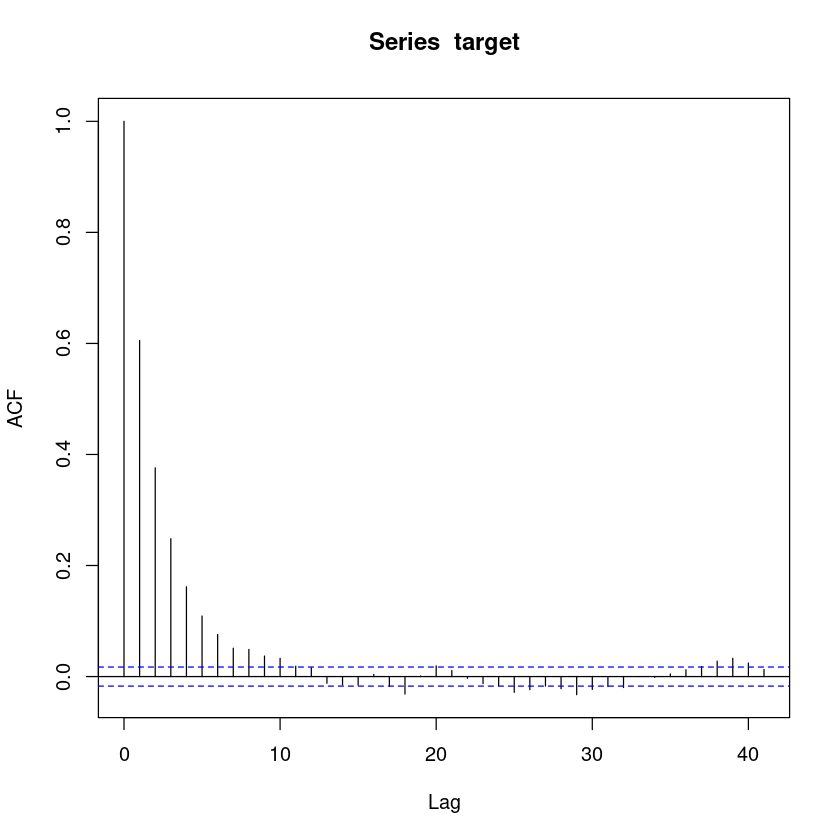

In [24]:
df <- read_csv("../data/premodel/XOM/1-set/time_ahead_1/data_scaler/df.csv")
target <- as.ts(df$Close_Ema_5)
autoplot(target)
acf(target)

target <- as.ts(df$Close_Ema_5_diff)
autoplot(target)
acf(target)

In [11]:
ndiffs(target, test='pp')

[1] 0

In [6]:
# x = Box.test(target, type='Ljung-Box')
z = diff(target)
x = Box.test(z, type='Ljung-Box')
print(x)
ndiffs(z, test='pp')


	Box-Ljung test

data:  z
X-squared = 59.253, df = 1, p-value = 1.388e-14



[1] 0

Warning message in par(new = TRUE):
“calling par(new=TRUE) with no plot”


[1] 3 4

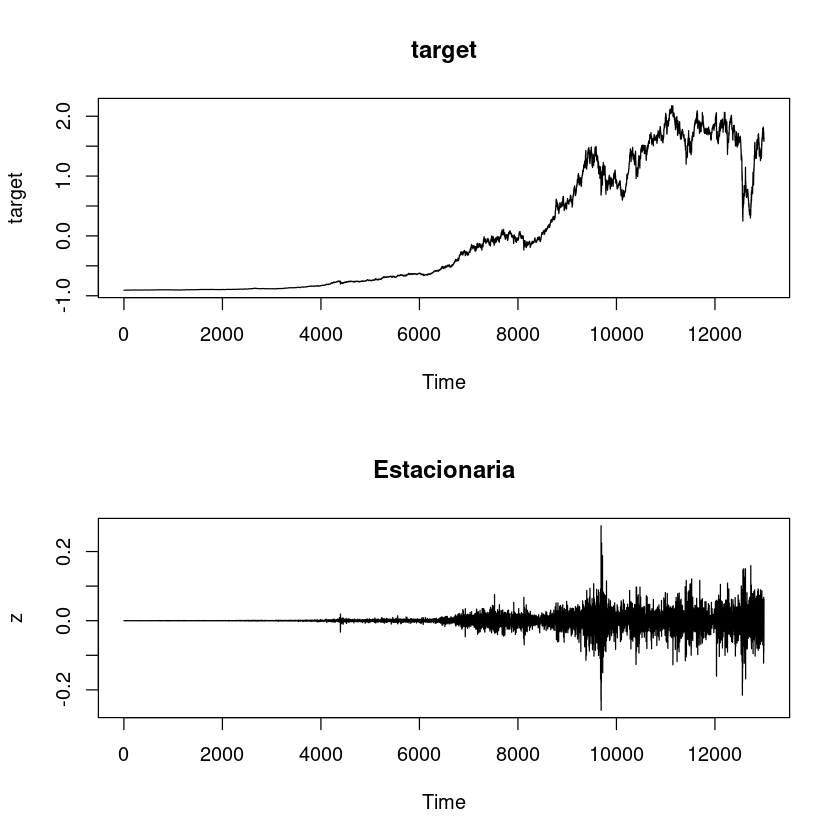

In [7]:
split.screen(figs=c(2, 1))
screen(1)
plot(target, main="target")
screen(2)
plot(z, main="Estacionaria")

[1] 0.6382008

[1] 9.779003e-05


	Anderson-Darling normality test

data:  prev$residuals
A = 1150.8, p-value < 2.2e-16



	Ljung-Box test

data:  Residuals from ARIMA(1,0,2) with zero mean
Q* = 11.591, df = 7, p-value = 0.1148

Model df: 3.   Total lags used: 10



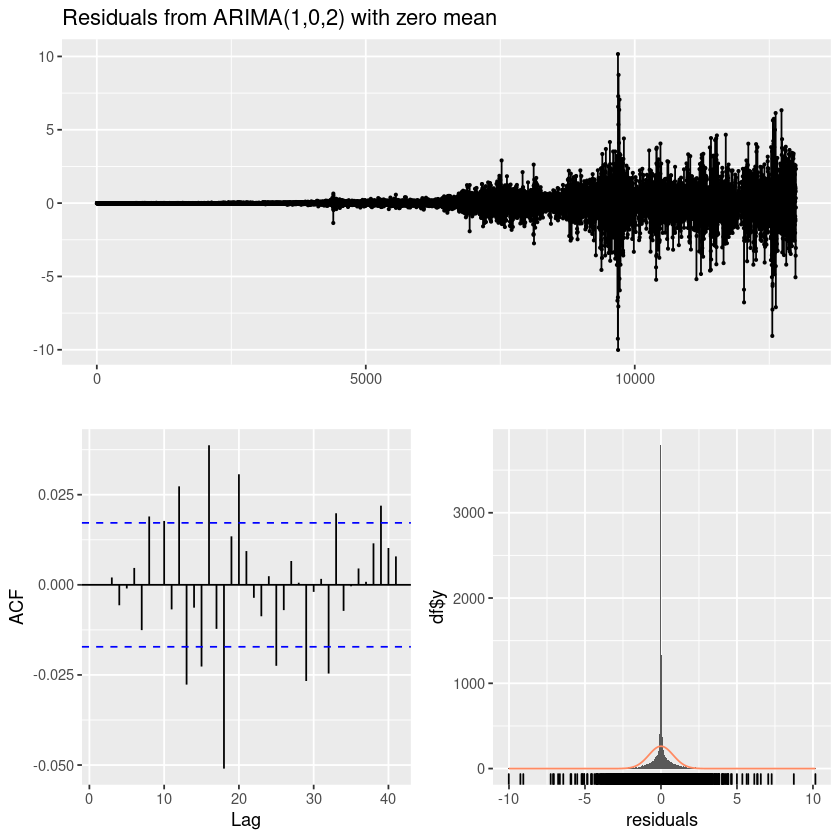

In [21]:
prev = auto.arima(target)
var(prev$residuals)
mean(as.vector(prev$residuals))
# shapiro.test(prev$residuals) # os residuais são normalmente distribuidos, se sim p > 0.05
ad.test(prev$residuals) # os residuais são normalmente distribuidos, se sim p > 0.05
checkresiduals(prev) # não existe correlação entre os residuos, se sim p > 0.05

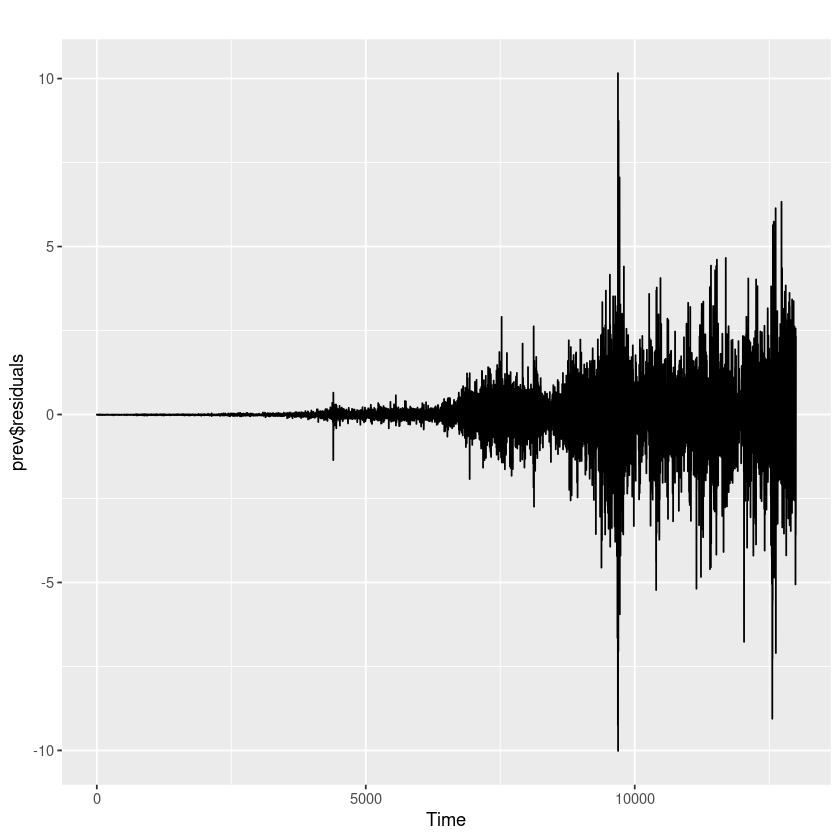

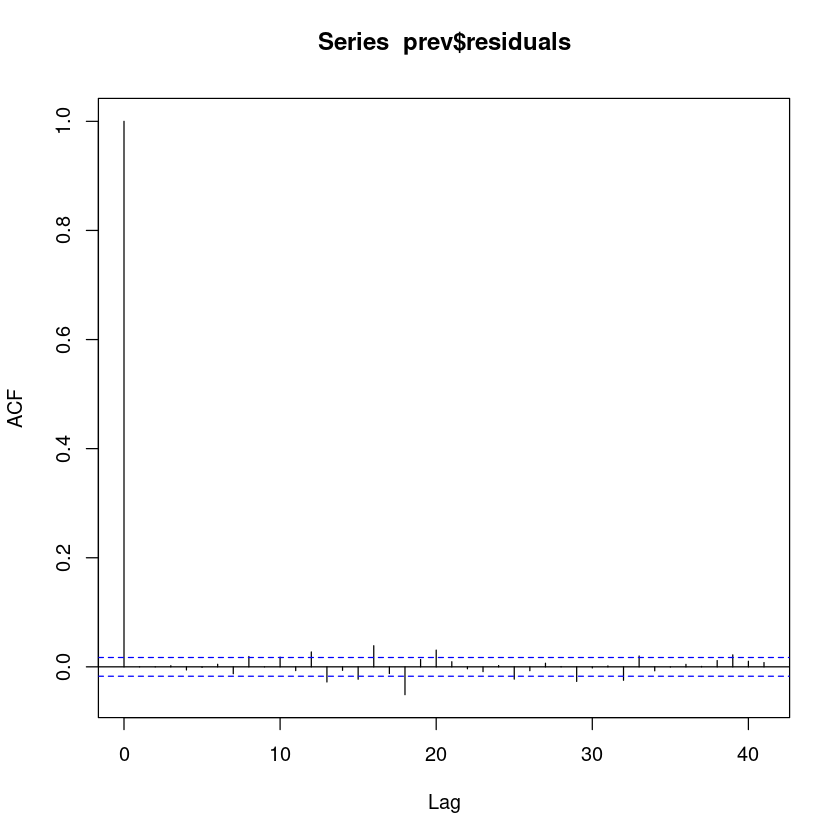

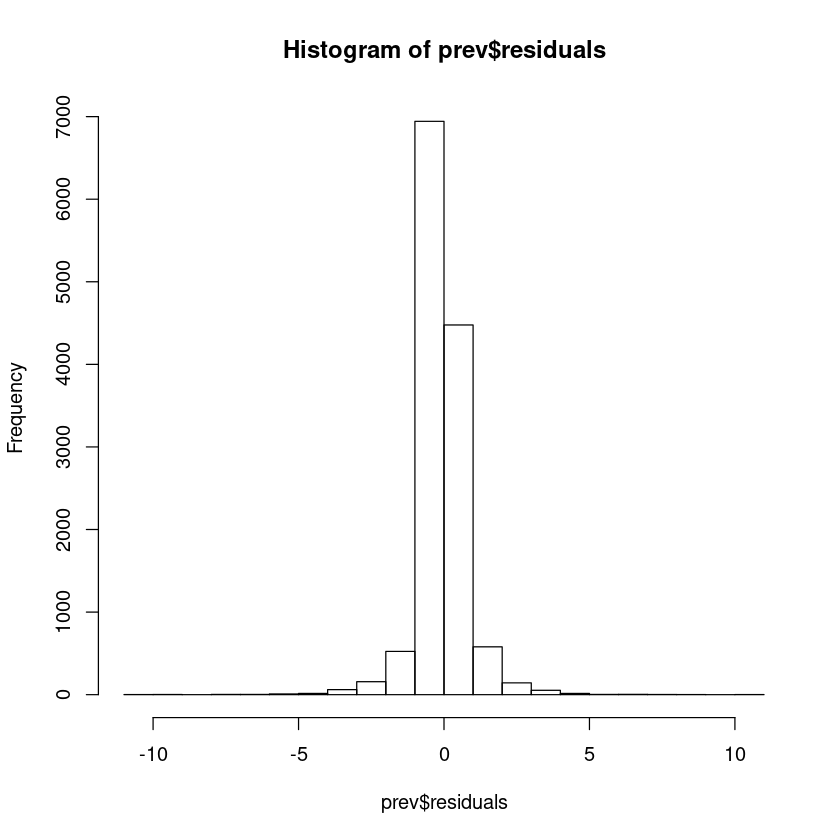

In [16]:
autoplot(prev$residuals)
acf(prev$residuals)
hist(prev$residuals)
